C:\Users\Floris\AppData\Local\Temp\ipykernel_4980\4117341782.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_data_clean['sleep_duration_class'] = sleep_data_clean['total_sleep_duration'].apply(classify_total_sleep)


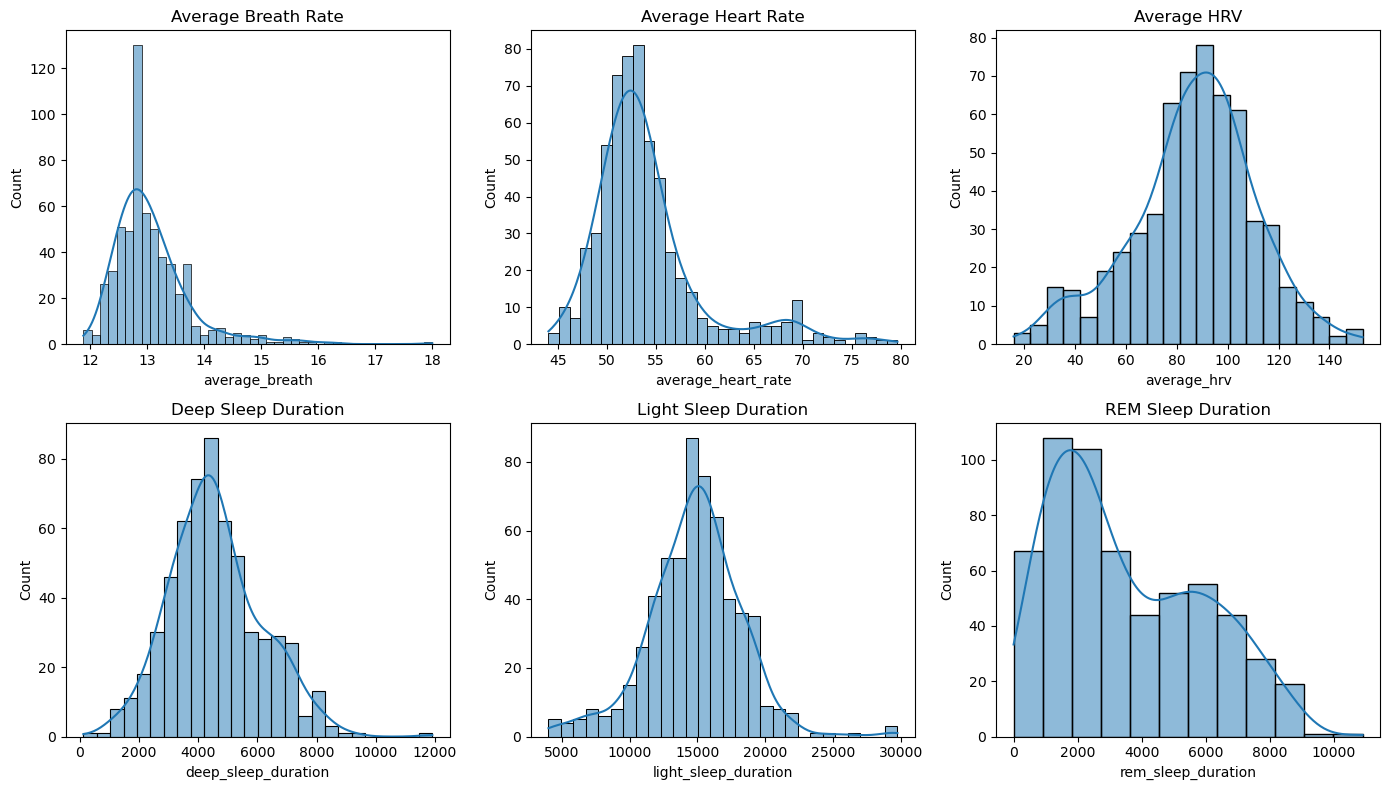

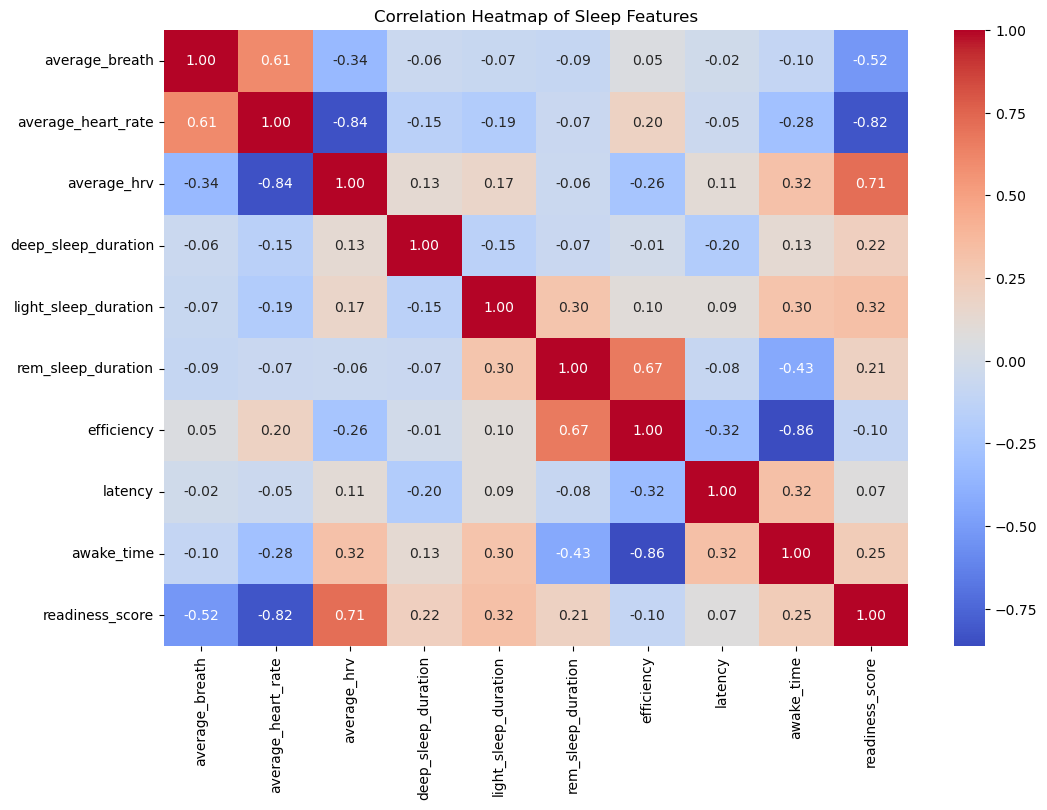

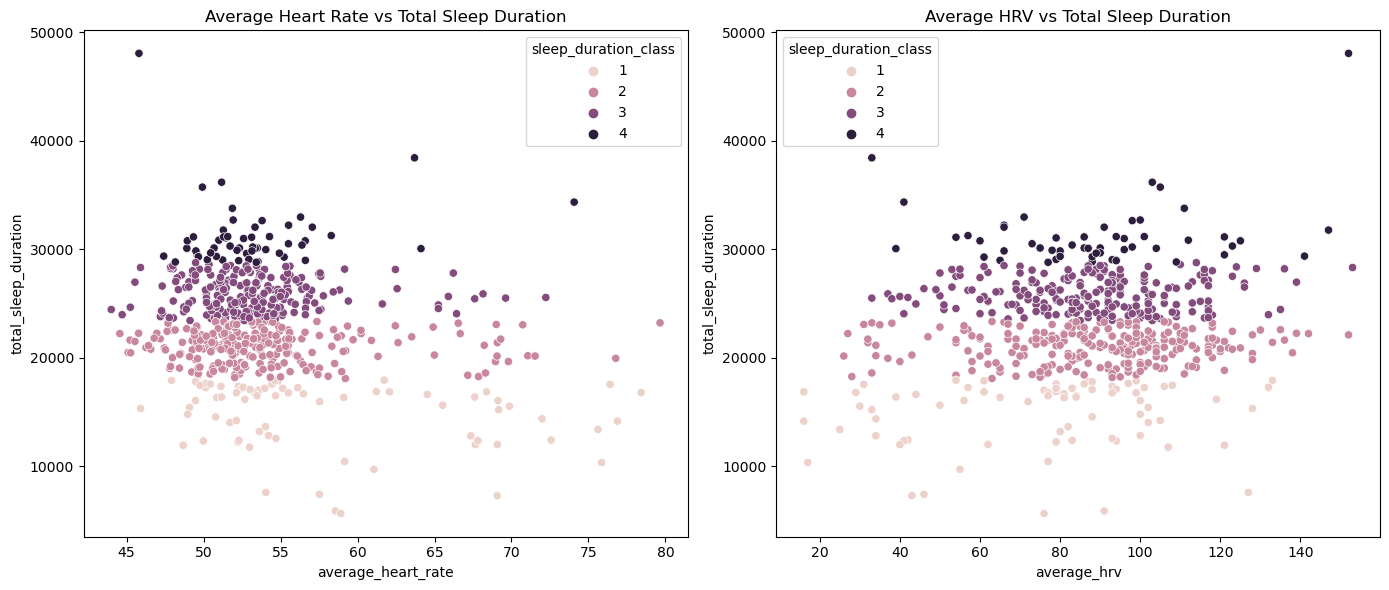

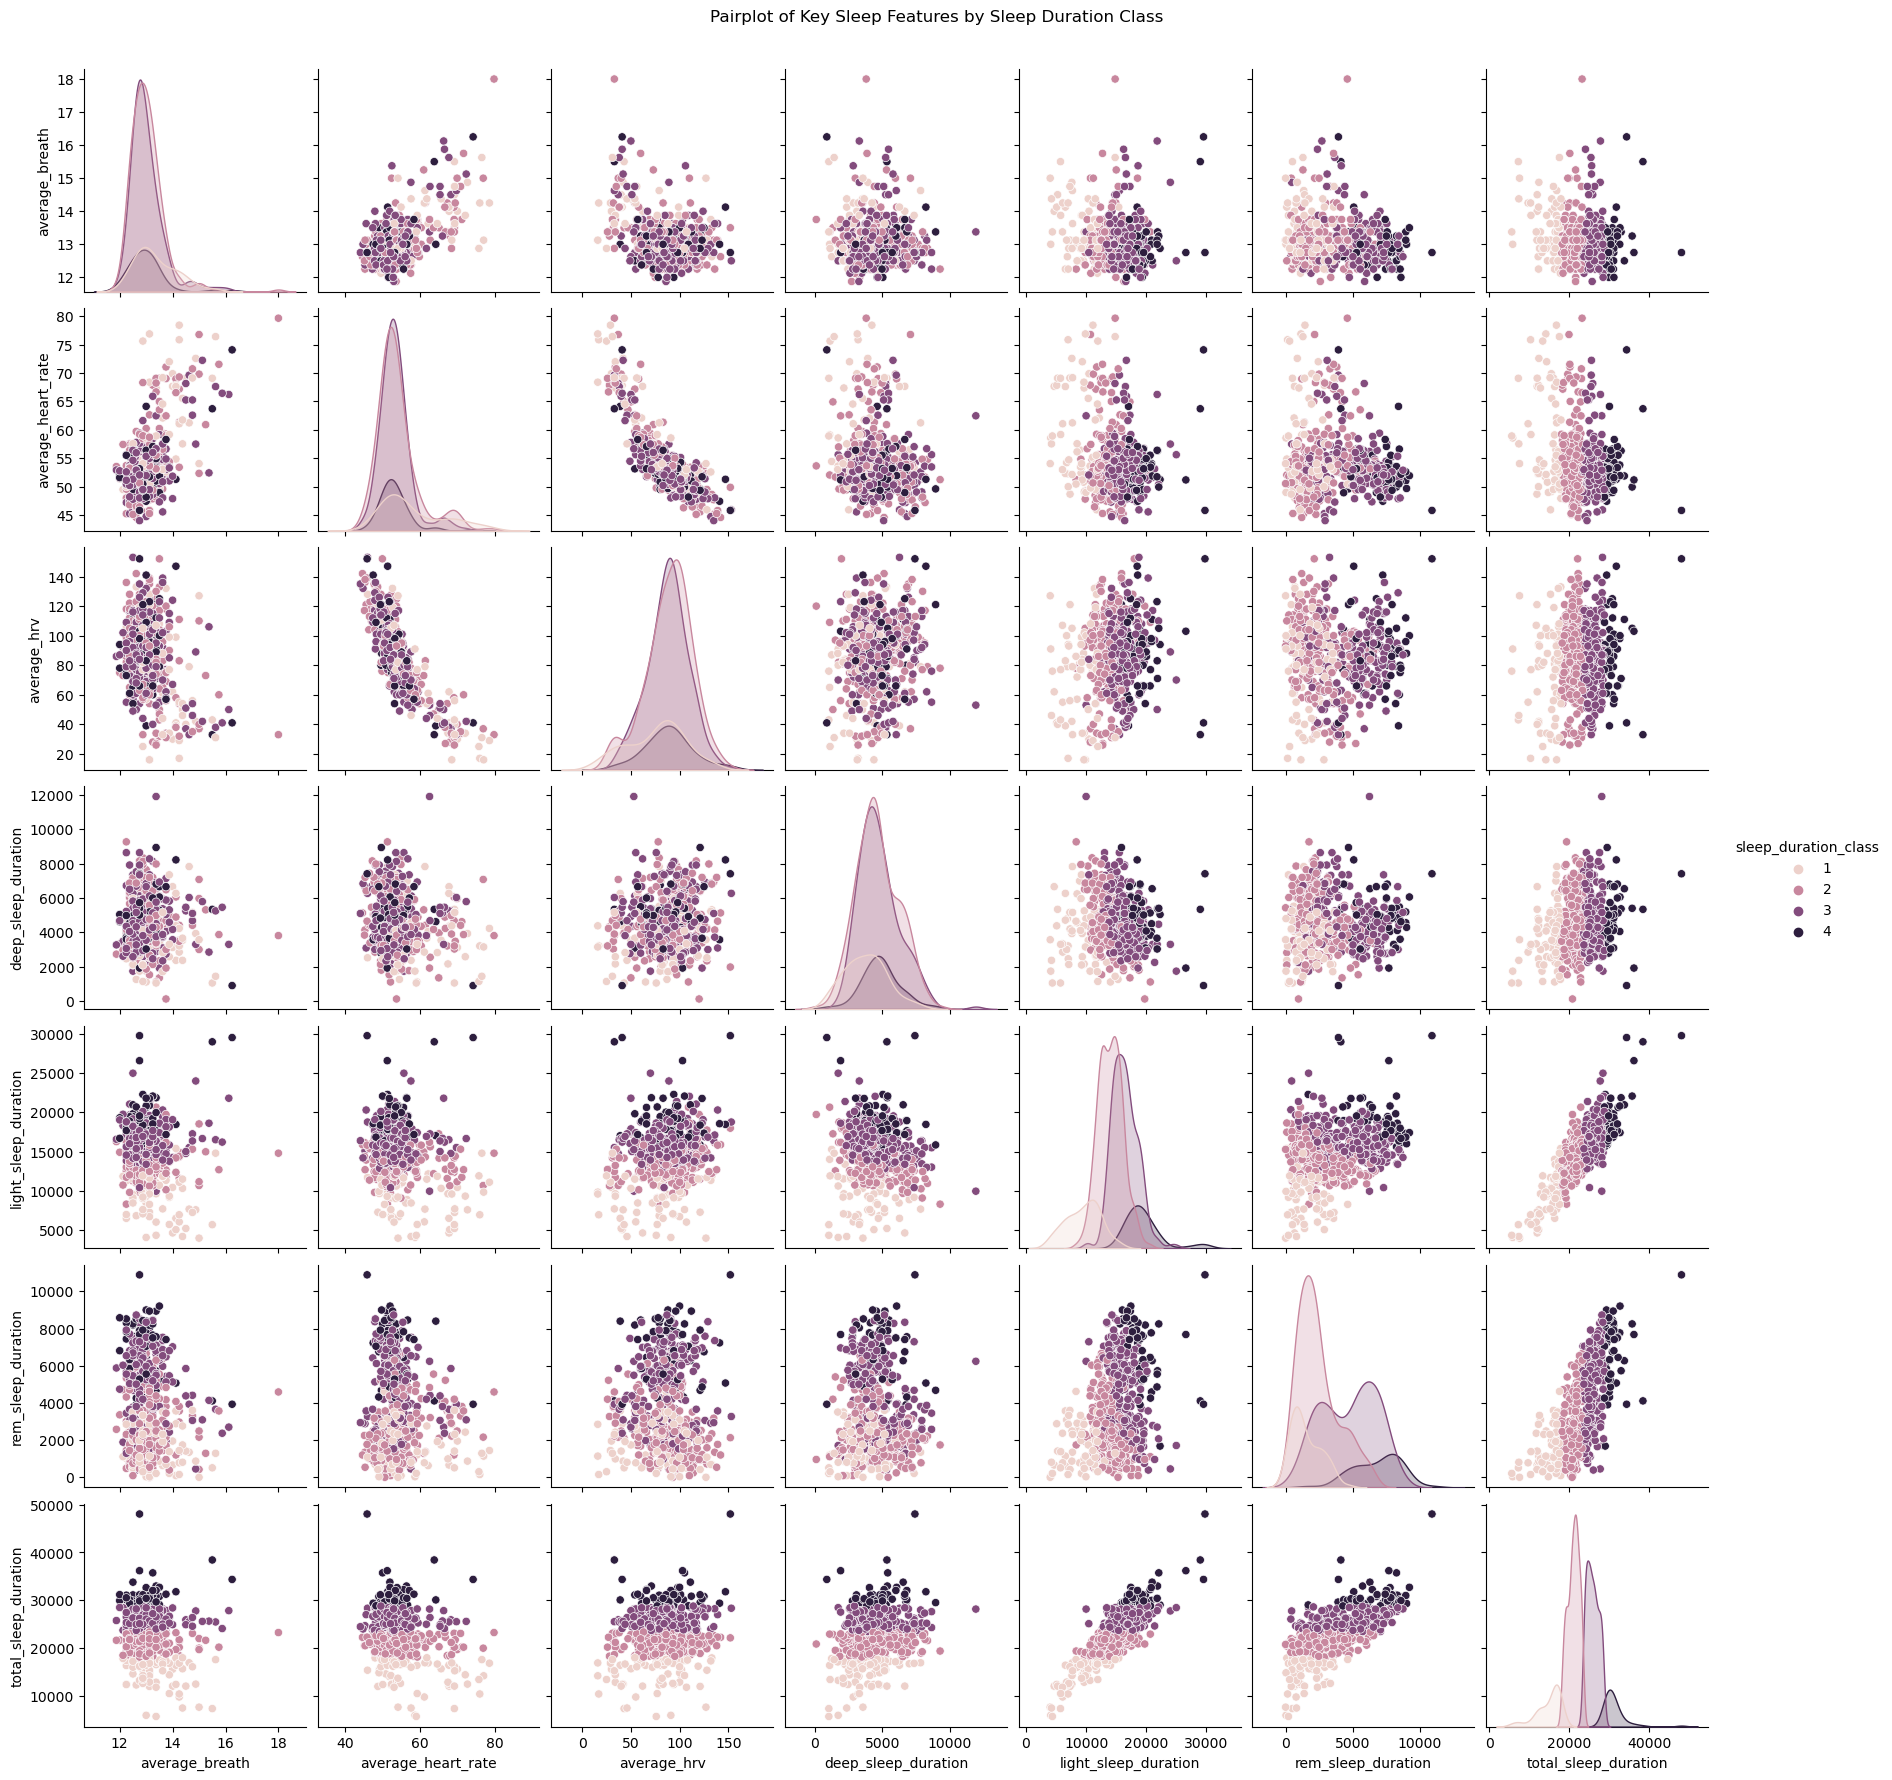

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
file_path = 'oura_sleep.csv'
file_path1 = 'oura_activity_data.csv'
sleep_data = pd.read_csv(file_path)
activity_data = pd.read_csv(file_path1)

# Remove rows with missing values
sleep_data_clean = sleep_data.dropna()

# Define class labels based on total sleep duration
def classify_total_sleep(duration):
    if duration < 5 * 60 * 60:
        return 1
    elif 5 * 60 * 60 <= duration < 6.5 * 60 * 60:
        return 2
    elif 6.5 * 60 * 60 <= duration < 8 * 60 * 60:
        return 3
    else:
        return 4

# Apply the function to create a new column
sleep_data_clean['sleep_duration_class'] = sleep_data_clean['total_sleep_duration'].apply(classify_total_sleep)

# Histograms for key features
plt.figure(figsize=(14, 8))
plt.subplot(2, 3, 1)
sns.histplot(sleep_data_clean['average_breath'], kde=True)
plt.title('Average Breath Rate')

plt.subplot(2, 3, 2)
sns.histplot(sleep_data_clean['average_heart_rate'], kde=True)
plt.title('Average Heart Rate')

plt.subplot(2, 3, 3)
sns.histplot(sleep_data_clean['average_hrv'], kde=True)
plt.title('Average HRV')

plt.subplot(2, 3, 4)
sns.histplot(sleep_data_clean['deep_sleep_duration'], kde=True)
plt.title('Deep Sleep Duration')

plt.subplot(2, 3, 5)
sns.histplot(sleep_data_clean['light_sleep_duration'], kde=True)
plt.title('Light Sleep Duration')

plt.subplot(2, 3, 6)
sns.histplot(sleep_data_clean['rem_sleep_duration'], kde=True)
plt.title('REM Sleep Duration')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = sleep_data_clean[['average_breath', 'average_heart_rate', 'average_hrv', 'deep_sleep_duration', 'light_sleep_duration', 'rem_sleep_duration', 'efficiency', 'latency', 'awake_time', 'readiness_score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Sleep Features')
plt.show()

# Scatter plots for some features against total sleep duration
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='average_heart_rate', y='total_sleep_duration', hue='sleep_duration_class', data=sleep_data_clean)
plt.title('Average Heart Rate vs Total Sleep Duration')

plt.subplot(1, 2, 2)
sns.scatterplot(x='average_hrv', y='total_sleep_duration', hue='sleep_duration_class', data=sleep_data_clean)
plt.title('Average HRV vs Total Sleep Duration')

plt.tight_layout()
plt.show()

# Pairplot for key features colored by sleep duration class
sns.pairplot(sleep_data_clean[['average_breath', 'average_heart_rate', 'average_hrv', 'deep_sleep_duration', 'light_sleep_duration', 'rem_sleep_duration', 'total_sleep_duration', 'sleep_duration_class']], hue='sleep_duration_class')
plt.suptitle('Pairplot of Key Sleep Features by Sleep Duration Class', y=1.02)
plt.show()


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define class labels based on total sleep duration
def classify_total_sleep(duration):
    if duration < 5 * 60 * 60:
        return 1
    elif 5 * 60 * 60 <= duration < 6.5 * 60 * 60:
        return 2
    elif 6.5 * 60 * 60 <= duration < 8 * 60 * 60:
        return 3
    else:
        return 4

# Apply the function to create a new column
sleep_data_clean['sleep_duration_class'] = sleep_data_clean['total_sleep_duration'].apply(classify_total_sleep)

# Select features and target
features = sleep_data_clean[['average_breath', 'average_heart_rate', 'average_hrv', 'deep_sleep_duration', 'light_sleep_duration', 'rem_sleep_duration', 'efficiency', 'latency', 'awake_time', 'readiness_score']]
target = sleep_data_clean['sleep_duration_class']

# Split the data into training (60%), validation (20%), and test sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train a classifier on the training set
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier on the validation set
y_val_pred = clf.predict(X_val)
validation_report = classification_report(y_val, y_val_pred, output_dict=True)

# Display the validation report
validation_report_df = pd.DataFrame(validation_report).transpose()
print(validation_report_df)


C:\Users\Floris\AppData\Local\Temp\ipykernel_4980\3192734789.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_data_clean['sleep_duration_class'] = sleep_data_clean['total_sleep_duration'].apply(classify_total_sleep)


              precision    recall  f1-score     support
1              0.800000  0.571429  0.666667   14.000000
2              0.800000  0.862745  0.830189   51.000000
3              0.705882  0.878049  0.782609   41.000000
4              1.000000  0.166667  0.285714   12.000000
accuracy       0.762712  0.762712  0.762712    0.762712
macro avg      0.826471  0.619722  0.641295  118.000000
weighted avg   0.787637  0.762712  0.738885  118.000000


In [3]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize the classifier
clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Set up cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store the results
accuracies = []
precisions = []
recalls = []
f1s = []

# Perform cross-validation
for train_index, val_index in kf.split(features, target):
    X_train, X_val = features.iloc[train_index], features.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    clf.fit(X_train, y_train)
    y_val_pred = clf.predict(X_val)
    
    accuracies.append(accuracy_score(y_val, y_val_pred))
    precisions.append(precision_score(y_val, y_val_pred, average='weighted'))
    recalls.append(recall_score(y_val, y_val_pred, average='weighted'))
    f1s.append(f1_score(y_val, y_val_pred, average='weighted'))

# Calculate average metrics
average_accuracy = sum(accuracies) / len(accuracies)
average_precision = sum(precisions) / len(precisions)
average_recall = sum(recalls) / len(recalls)
average_f1 = sum(f1s) / len(f1s)

# Display results
print(f"Cross-Validation Results (5-fold):")
print(f"Average Accuracy: {average_accuracy:.2f}")
print(f"Average Precision: {average_precision:.2f}")
print(f"Average Recall: {average_recall:.2f}")
print(f"Average F1-Score: {average_f1:.2f}")


Cross-Validation Results (5-fold):
Average Accuracy: 0.84
Average Precision: 0.84
Average Recall: 0.84
Average F1-Score: 0.83


In [4]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize the classifier
clf = SVC(class_weight='balanced', random_state=42)

# Set up cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store the results
accuracies = []
precisions = []
recalls = []
f1s = []

# Perform cross-validation
for train_index, val_index in kf.split(features, target):
    X_train, X_val = features.iloc[train_index], features.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    clf.fit(X_train, y_train)
    y_val_pred = clf.predict(X_val)
    
    accuracies.append(accuracy_score(y_val, y_val_pred))
    precisions.append(precision_score(y_val, y_val_pred, average='weighted'))
    recalls.append(recall_score(y_val, y_val_pred, average='weighted'))
    f1s.append(f1_score(y_val, y_val_pred, average='weighted'))

# Calculate average metrics
average_accuracy = sum(accuracies) / len(accuracies)
average_precision = sum(precisions) / len(precisions)
average_recall = sum(recalls) / len(recalls)
average_f1 = sum(f1s) / len(f1s)

# Display results
print(f"Cross-Validation Results (5-fold) with SVM:")
print(f"Average Accuracy: {average_accuracy:.2f}")
print(f"Average Precision: {average_precision:.2f}")
print(f"Average Recall: {average_recall:.2f}")
print(f"Average F1-Score: {average_f1:.2f}")


Cross-Validation Results (5-fold) with SVM:
Average Accuracy: 0.89
Average Precision: 0.90
Average Recall: 0.89
Average F1-Score: 0.89


In [5]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Split the data into training (60%), validation (20%), and test sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the classifier
clf = SVC(class_weight='balanced', random_state=42)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Predict on the test set
y_test_pred = clf.predict(X_test)

# Evaluate the classifier on the test set
test_report = classification_report(y_test, y_test_pred, output_dict=True)
test_report_df = pd.DataFrame(test_report).transpose()

# Display the test set evaluation report
print("Test Set Evaluation Report:")
print(test_report_df)


Test Set Evaluation Report:
              precision    recall  f1-score     support
1              0.750000  0.947368  0.837209   19.000000
2              0.906977  0.866667  0.886364   45.000000
3              0.974359  0.863636  0.915663   44.000000
4              0.750000  0.900000  0.818182   10.000000
accuracy       0.881356  0.881356  0.881356    0.881356
macro avg      0.845334  0.894418  0.864354  118.000000
weighted avg   0.893523  0.881356  0.883596  118.000000


In [18]:
# Load the data
file_path = 'oura_sleep.csv'
file_path1 = 'oura_daily_activity.csv'
sleep_data = pd.read_csv(file_path)
activity_data = pd.read_csv(file_path1)

sa_data = pd.merge(sleep_data, activity_data, on='day', how='inner')

# Remove rows with missing values
sa_data_clean = sa_data.dropna()

# Apply the function to create a new column
sa_data_clean['sleep_duration_class'] = sa_data_clean['total_sleep_duration'].apply(classify_total_sleep)


C:\Users\Floris\AppData\Local\Temp\ipykernel_4980\2814881931.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa_data_clean['sleep_duration_class'] = sa_data_clean['total_sleep_duration'].apply(classify_total_sleep)
